In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df= pd.read_excel('Superstore_USA.xlsx')

In [13]:
df.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


In [14]:
df1 = pd.read_excel('Superstore_USA.xlsx', sheet_name='Returns')

In [85]:

df1.head()

,Order ID,Status
0,65,Returned
1,612,Returned
2,614,Returned
3,678,Returned
4,710,Returned


In [8]:
df2 = pd.read_excel('Superstore_USA.xlsx', sheet_name='Users')

In [9]:
df2

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William


In [16]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [17]:
#4 . try  to join order and return data both in sql and pandas 

In [20]:
order_return = df.join(df1, lsuffix="_order", rsuffix="_returns")

In [21]:
order_return

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID_order,Order ID_returns,Status
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,65.0,Returned
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,612.0,Returned
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,614.0,Returned
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,678.0,Returned
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,710.0,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,NaN,NaN
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,NaN,NaN
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,NaN,NaN
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,NaN,NaN


In [22]:
#5 . Try to find out how many unique customer that we have 

In [30]:
unique_count = len(set(df['Customer Name'].unique().tolist()))
print("The total unique customer count list : ", unique_count)

The total unique customer count list :  2703


In [33]:
#6 . try to find out in how many regions we are selling a product and who is a manager for a respective region
df2

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William


In [36]:
#7 . find out how many different differnet shipement mode that we have and what is a percentage usablity of all 
#the shipment mode with respect to dataset 
df['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [38]:
set(df['Ship Mode'])

{'Delivery Truck', 'Express Air', 'Regular Air'}

In [40]:
len(set(df['Ship Mode']))

3

Counter({'Regular Air': 7036, 'Delivery Truck': 1283, 'Express Air': 1107})


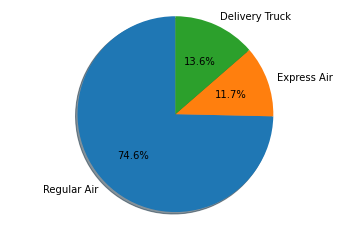

In [43]:
from collections import Counter
count = Counter(df['Ship Mode'].to_list())
print(count)

key_list = list(count.keys())
val_list = list(count.values())

fig1, ax1 = plt.subplots()
ax1.pie(val_list, labels=key_list, autopct = '%1.1f%%', shadow= True, startangle = 90)
ax1.axis('equal')
plt.show()


Counter({'Regular Air': 7036, 'Delivery Truck': 1283, 'Express Air': 1107})


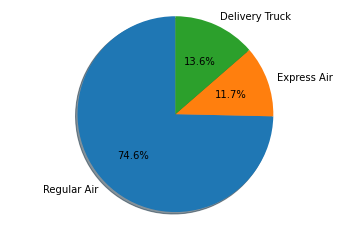

In [53]:
from collections import Counter
count = Counter(df['Ship Mode'].to_list())
print(count)

key_list = list(count.keys())
val_list = list(count.values())

fig1, ax1 = plt.subplots()
ax1.pie(val_list, labels=key_list, autopct = '%1.01f%%', shadow= True, startangle = 90)
ax1.axis('equal')
plt.show()

In [56]:
len(df['Ship Mode'])

9426

In [63]:
ship_c =df['Ship Mode'].value_counts()
ship_c

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [59]:
df['ship_per'] =100* df['Ship Mode'].value_counts()/ len(df['Ship Mode'])

In [64]:
df.drop('ship_per',axis=1,inplace=True)

In [65]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,East,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,East,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530


In [67]:
#8 . Create a new coulmn and try to find our a diffrence between order date and shipment date
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [71]:
df['diff_dates']= df['Ship Date']-df['Order Date']

In [72]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,diff_dates
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,2 days
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,1 days
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,1 days
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,1 days
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,1 days
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,0 days
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,2 days
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,3 days


In [73]:
#9 . base on question number 8 find out for which order id we have shipment duration more than 10 days 

In [74]:
df.dtypes

Row ID                            int64
Order Priority                   object
Discount                        float64
Unit Price                      float64
Shipping Cost                   float64
Customer ID                       int64
Customer Name                    object
Ship Mode                        object
Customer Segment                 object
Product Category                 object
Product Sub-Category             object
Product Container                object
Product Name                     object
Product Base Margin             float64
Region                           object
State or Province                object
City                             object
Postal Code                       int64
Order Date               datetime64[ns]
Ship Date                datetime64[ns]
Profit                          float64
Quantity ordered new              int64
Sales                           float64
Order ID                          int64
diff_dates              timedelta64[ns]


In [75]:
df['diff_dates']=df['diff_dates'].dt.days.astype('int16')

In [76]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
diff_dates                       int16
dtype: object

In [80]:
df[df['diff_dates']>10]['Order ID'].to_list()

[87215,
 86318,
 86318,
 87957,
 87957,
 87957,
 19556,
 19556,
 19556,
 86177,
 88223,
 88352,
 87572,
 91294,
 86434,
 86436,
 86436,
 87300,
 19841,
 19841,
 19841,
 87300,
 87300]

In [81]:
#10 .  Try to find out a list of a returned order which sihpment duration was more then 15 days 
# and find out that region manager as well

In [96]:
df_df1 = df.join(df1, lsuffix="order", rsuffix="_status")

In [97]:
df_df1

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order IDorder,diff_dates,Order ID_status,Status
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,2,65.0,Returned
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,1,612.0,Returned
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,1,614.0,Returned
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,1,678.0,Returned
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,0,710.0,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,1,NaN,NaN
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,0,NaN,NaN
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,2,NaN,NaN
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,3,NaN,NaN


In [98]:
df_df1_df2 = df_df1.join(df2, lsuffix="region", rsuffix="_manager")


In [101]:
df_df1_df2.iloc[25:30]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Ship Date,Profit,Quantity ordered new,Sales,Order IDorder,diff_dates,Order ID_status,Status,Region_manager,Manager
25,20925,Medium,0.01,35.94,6.66,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,2010-05-28,261.8757,10,379.53,86839,0,5028.0,Returned,NaN,NaN
26,18263,Medium,0.03,1.76,0.70,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,2011-12-06,-1.1700,10,17.39,86840,2,5059.0,Returned,NaN,NaN
27,18554,Medium,0.04,5.98,5.20,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,2012-05-01,-24.0300,3,19.04,86841,2,5061.0,Returned,NaN,NaN
28,22781,Low,0.00,7.59,4.00,15,Timothy Reese,Regular Air,Small Business,Furniture,...,2013-01-21,23.2668,4,33.72,86842,2,5189.0,Returned,NaN,NaN
29,23287,Low,0.07,4.13,6.89,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,2013-01-23,-174.2696,9,38.18,86843,2,5381.0,Returned,NaN,NaN


In [88]:
df1.head()

,Order ID,Status
0,65,Returned
1,612,Returned
2,614,Returned
3,678,Returned
4,710,Returned


In [89]:
df2

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William


In [102]:
#11 . Gorup by region and find out which region is more profitable 

In [113]:
region_profit = pd.DataFrame(df.groupby('Region')['Profit'].sum())
region_profit.reset_index(inplace=True)
max_proft_region = region_profit[region_profit['Profit']==max(region_profit['Profit'])].Region.to_list()
max_proft_region


['Central']

In [114]:
#12 . Try to find out overalll in which country we are giving more didscount 

In [115]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'diff_dates'],
      dtype='object')

In [123]:
disc = pd.DataFrame(df.groupby('State or Province')['Discount'].sum())
disc.head(2)

,Discount
State or Province,
Alabama,5.87
Arizona,6.86


In [125]:
disc[disc['Discount'] == max(disc['Discount'])]

,Discount
State or Province,
California,52.28


In [136]:
#13 . Give me a list of unique postal code

In [142]:
df['Postal Code'].unique()

array([60101, 98221, 91776, ..., 61832, 62521, 26554], dtype=int64)

In [143]:
#14 . which customer segement is more profitalble find it out . 

In [158]:
# df[['Customer Segment','Profit']]
prof = df.groupby('Customer Segment')['Profit'].sum()
prof.reset_index()


,Customer Segment,Profit
0,Consumer,206559.625348
1,Corporate,505538.627783
2,Home Office,283869.553814
3,Small Business,316474.592482


In [171]:
prof

Customer Segment
Consumer          206559.625348
Corporate         505538.627783
Home Office       283869.553814
Small Business    316474.592482
Name: Profit, dtype: float64

In [172]:
#15 . try to find out the 10th most loss making product catagory .

In [173]:
prod_cat = pd.DataFrame(df.groupby('Product Sub-Category')['Profit'].sum())
prod_cat.reset_index(inplace=True)
loss_prod_cad = prod_cat[prod_cat['Profit']==min([prod_cat['Profit']])]['Product Sub-Category'].to_list()
print('The product category in loss is ',loss_prod_cad[0]," with loss to total ",min(prod_cat['Profit']))

The product category in loss is  Appliances  with loss to total  -72495.06187475001


In [174]:
#16 . Try to find out 10 top  product with highest margins 

In [175]:
df['Product Base Margin'].fillna(method = 'Backfill',inplace = True) 
prod_margin1 = pd.DataFrame(df.groupby('Product Name')['Product Base Margin'].sum())
prod_margin1.reset_index(inplace=True)
prod_margin1.sort_values('Product Base Margin',inplace = True)
top_10 = prod_margin1[-10:]
top_10.sort_values('Product Base Margin',inplace = True, ascending=False)
top_10['Product Name'].to_list()

C:\Users\SAICHARAN\AppData\Local\Temp\ipykernel_8828\3487702377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10.sort_values('Product Base Margin',inplace = True, ascending=False)


['Global High-Back Leather Tilter, Burgundy',
 'BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables',
 'Bevis 36 x 72 Conference Tables',
 'Adesso Programmable 142-Key Keyboard',
 'Accessory36',
 'Office Star - Mid Back Dual function Ergonomic High Back Chair with 2-Way Adjustable Arms',
 'Office Star - Contemporary Task Swivel chair with 2-way adjustable arms, Plum',
 'Microsoft Internet Keyboard',
 'StarTAC 7760',
 'Bell Sonecor JB700 Caller ID']